# CIFAR-10 dataset classification
## Net 1

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

# Importing basic dependencies

In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
# del model
import torch
import torch.nn as nn
import torch.optim as optim
from Utilities.model import Net1
from Utilities.utils import train, test
import torch.nn.functional as F
from torchsummary import summary

torch.manual_seed(1)

In [12]:
CLASSES = ("Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck")

# Model Initialization & Summary

In [13]:
device = torch.device("mps")
model = Net1()
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 32, 32]           4,640
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 16, 32, 32]             528
         MaxPool2d-8           [-1, 16, 16, 16]               0
            Conv2d-9           [-1, 16, 16, 16]           2,320
             ReLU-10           [-1, 16, 16, 16]               0
      BatchNorm2d-11           [-1, 16, 16, 16]              32
           Conv2d-12           [-1, 32, 16, 16]           4,640
             ReLU-13           [-1, 32, 16, 16]               0
      BatchNorm2d-14           [-1, 32,

# Dataset & Dataloaders

In [14]:
from Utilities.transforms import train_transforms, test_transforms

In [15]:
from Utilities.dataset import get_dataloaders

batch_size = 64

kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 4, 'pin_memory': True}
train_loader, test_loader = get_dataloaders(train_transforms=train_transforms, test_transforms=test_transforms, **kwargs)

Files already downloaded and verified
Files already downloaded and verified


# Data Exploration

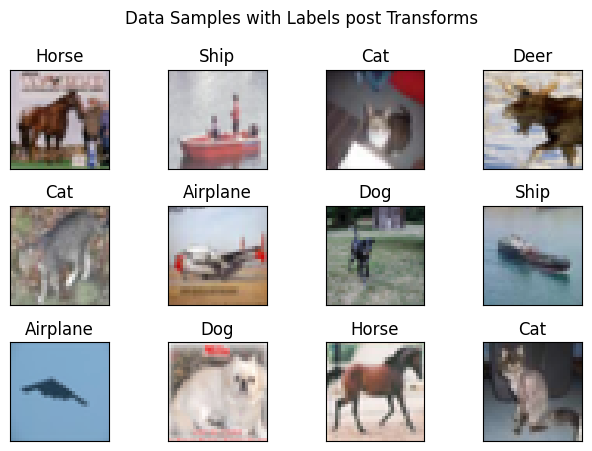

In [16]:
from Utilities.visualize import plot_data_samples, plot_class_label_counts

# plot_class_label_counts(train_loader, classes=CLASSES)
plot_data_samples(train_loader, classes=CLASSES)

# Training

In [17]:
model = Net1().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1, verbose=True)
# New Line
criterion = F.nll_loss
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_accs, train_losses = train(model, device, train_loader, optimizer, criterion)
  test_accs, test_losses = test(model, device, test_loader, criterion)
  scheduler.step()

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 1
Train: 100% Loss=0.8940 Batch_id=781 Accuracy=44.97
Test set: Average loss: 1.3006, Accuracy: 5371/10000 (53.71%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 2
Train: 100% Loss=1.2269 Batch_id=781 Accuracy=60.37
Test set: Average loss: 0.9936, Accuracy: 6451/10000 (64.51%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 3
Train: 100% Loss=0.9223 Batch_id=781 Accuracy=65.43
Test set: Average loss: 0.9180, Accuracy: 6716/10000 (67.16%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 4
Train: 100% Loss=0.8520 Batch_id=781 Accuracy=68.46
Test set: Average loss: 0.9055, Accuracy: 6807/10000 (68.07%)

Adjusting learning rate of group 0 to 5.0000e-02.
Epoch 5
Train: 100% Loss=1.0837 Batch_id=781 Accuracy=71.12
Test set: Average loss: 0.8662, Accuracy: 6963/10000 (69.63%)

Adjusting learning rate of group 0 to 5.0000e-03.
Epoch 6
Train: 100% Loss=0.9488 Batch_id=781 Accuracy=76.06
Test set: Average loss: 0

**Target**
1. Set up a model structure, borrowed from previous exercise
2. Basic code from the previous exercise
3. CenterCrop as transform

**Results**
1. Train Acc: 99.31
2. Test Acc: 99.44
3. Parameters: 20k

**Analysis**
1. The model does achieve the target of 99.4% accuracy and is consistent too.
2. The model is under-fitting without any drop-out, our transform seems to be doing a good job making the training hard.
3. Let's see what the model can do with the least parameters setup.

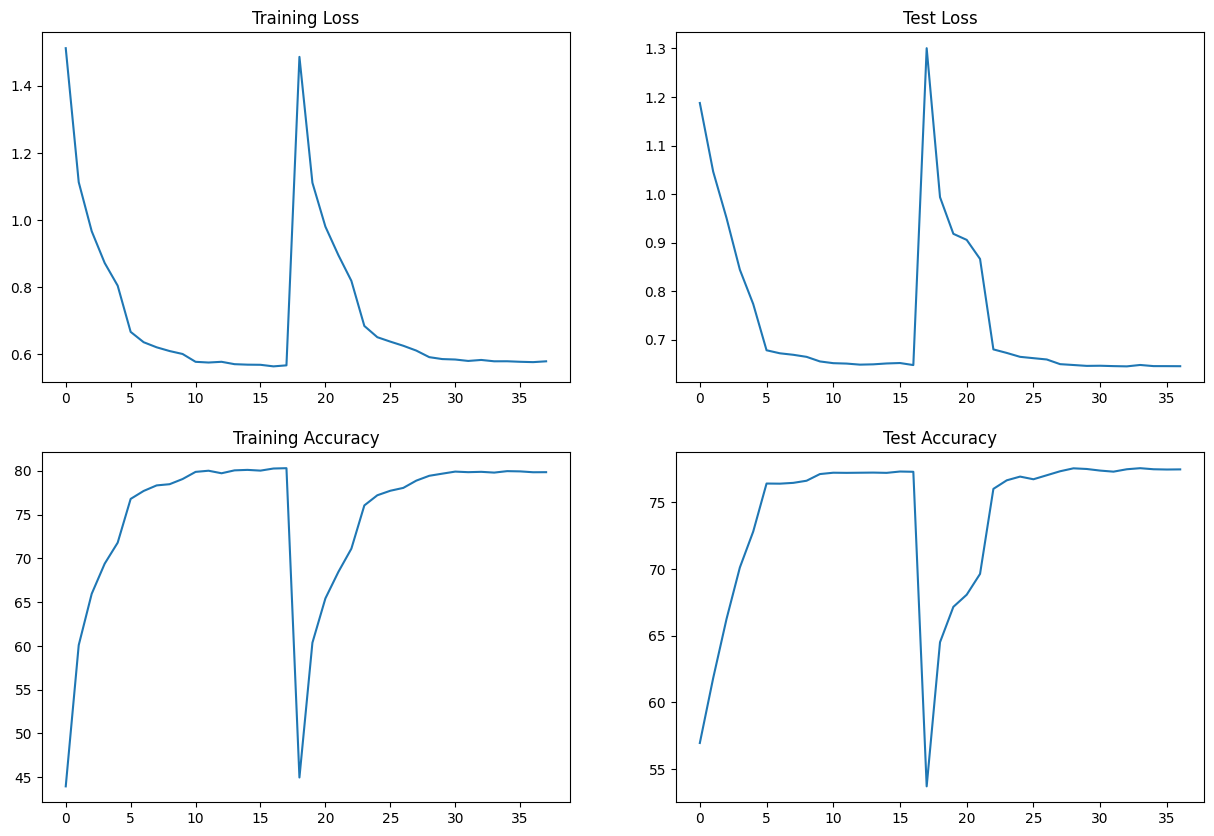

In [18]:
from Utilities.visualize import plot_model_training_curves

plot_model_training_curves(train_accs=train_accs, test_accs=test_accs, train_losses=train_losses, test_losses=test_losses)

# Model Analysis

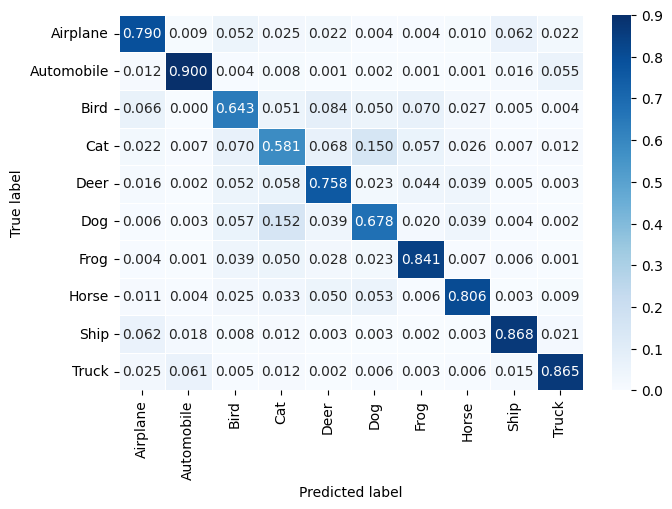

In [8]:
from Utilities.utils import get_all_and_incorrect_preds
from Utilities.visualize import plot_confusion_matrix

all_preds, all_labels, incorrect = get_all_and_incorrect_preds(model=model, loader=test_loader, device=device)
plot_confusion_matrix(all_labels, all_preds, classes=CLASSES)

Total Incorrect Predictions 2270


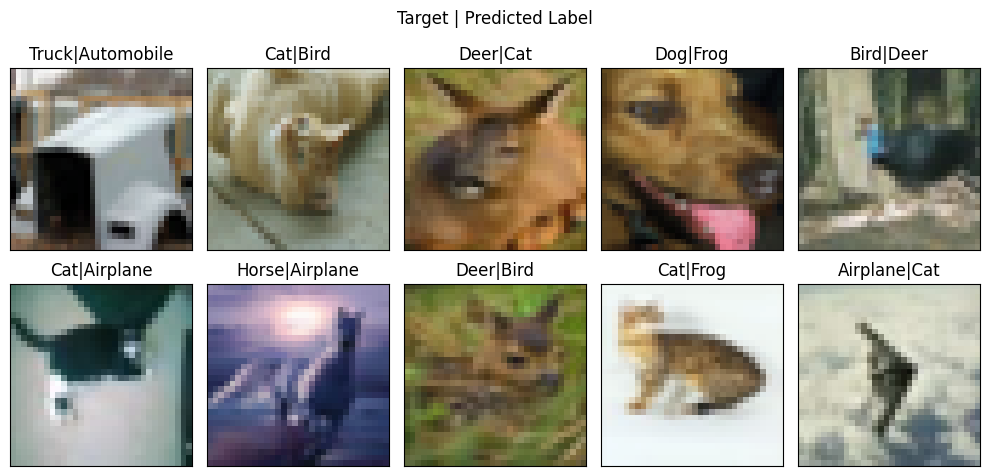

In [9]:
from Utilities.visualize import plot_incorrect_preds

plot_incorrect_preds(incorrect, classes=CLASSES)